# Behavioral data
Load data and example plots

#### from: Goldbach, Akitake, Leedy, Histed, "Performance in even a simple perceptual task depends on mouse secondary visual areas"

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os,sys
from pathlib import Path

sys.path.append('../src')
import HVA_regression as hreg2

sns.set_style('whitegrid')

r_ = np.r_

## load data

In [2]:
#load all data from all sessions 
sessions = pd.read_hdf(Path('../data/behavior_data_in.h5'), key = 'Animal')

# load regression data
dfVary = pd.read_hdf(Path('../data/pairwise-regress-stats-varyslope-v21.h5', key='stats'))
dfFixed = pd.read_hdf(Path('../data/pairwise-regress-stats-v21.h5', key='stats'))

# Plot data

### Fixed slope regression

'slope is 269, slope ci is 269-269'

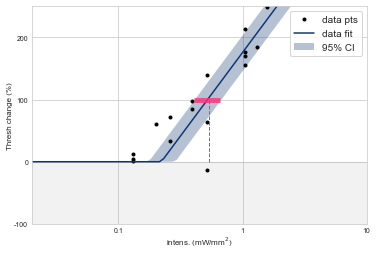

In [3]:
spot = 1.31

tR = dfFixed.loc[dfFixed.spot==spot,:].iloc[0,:]  # boolean indexing returns a dataframe; extract the series

indf = sessions[sessions['brainPower'] == spot]
xs = indf['mWmm2'].to_numpy()
ys = indf['% Increase'].to_numpy()

newXLim = r_[0.02,50]
tR = hreg2.recompute_yshighlow_for_fixedslope(tR, xsLim=newXLim)
fig = hreg2.fig_data_and_fit(xs, ys, tR.fullFitX, tR.xsPred, tR.ysLow, tR.ysHigh, fitRow=tR)
display(f'slope is {tR.fullFitX[1]:.3g}, slope ci is {tR.paramLow[1]:.3g}-{tR.paramHigh[1]:.3g}')

### Varied slope regression

'slope is 210, slope ci is 164-541'

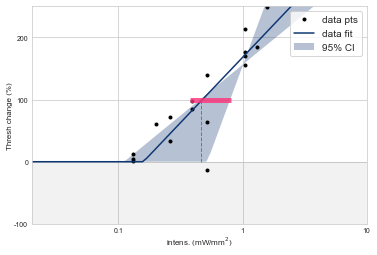

In [4]:
spot = 1.31

tR = dfVary.loc[dfVary.spot==spot,:].iloc[0,:]  # boolean indexing returns a dataframe; extract the series

indf = sessions[sessions['brainPower'] == spot]
xs = indf['mWmm2'].to_numpy()
ys = indf['% Increase'].to_numpy()

newXLim = r_[0.02,50]
tR = hreg2.recompute_yshighlow_for_fixedslope(tR, xsLim=newXLim)
fig = hreg2.fig_data_and_fit(xs, ys, tR.fullFitX, tR.xsPred, tR.ysLow, tR.ysHigh, fitRow=tR)
display(f'slope is {tR.fullFitX[1]:.3g}, slope ci is {tR.paramLow[1]:.3g}-{tR.paramHigh[1]:.3g}')

### Distribution of thresholds

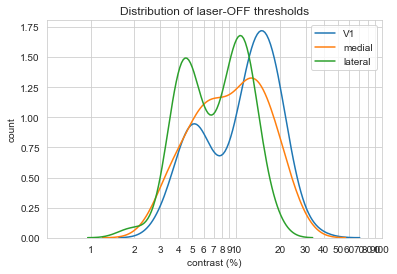

In [5]:
areas = 'V1', 'medial', 'lateral' 
fig, ax = plt.subplots()
for area in areas: 
    tSer = sessions[sessions['Area'] == area]['B2 Thresh']
    sns.distplot(np.log10(tSer.to_numpy()), hist = False, label = area)
plt.xlabel('contrast (%)')
plt.ylabel('count')
plt.title('Distribution of laser-OFF thresholds')
#ax.set_xscale('symlog', linthreshx=0.025, base=10)
#ax.set_xscale('log')
ax.set_xticks(np.log10(r_[0.01:0.1:0.01,0.1:1.1:0.1]))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: f'{100*10**x:.3g}'))
ax.set_xlim(np.log10(r_[0.005,1.0]))
plt.legend()